In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://rsearchprojectstorage1.blob.core.windows.net/dataset/pone.0200122.s003.csv2.csv")

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
print(X_train.shape)


(146, 138)


In [7]:
print(y_train.shape)

(146,)


In [8]:
print(X_test.shape)

(72, 138)


In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=1, activation ="linear")
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               17792     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 50,945
Trainable params: 50,945
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error',  'mean_squared_error'])

In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 137ms/step - loss: 0.4505 - mean_absolute_error: 0.6048 - mean_squared_error: 0.4505 - val_loss: 0.2314 - val_mean_absolute_error: 0.3234 - val_mean_squared_error: 0.2314
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.2353 - mean_absolute_error: 0.3430 - mean_squared_error: 0.2353 - val_loss: 0.1138 - val_mean_absolute_error: 0.2669 - val_mean_squared_error: 0.1138
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0694 - mean_absolute_error: 0.1936 - mean_squared_error: 0.0694 - val_loss: 0.0399 - val_mean_absolute_error: 0.1560 - val_mean_squared_error: 0.0399
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0487 - mean_absolute_error: 0.1560 - mean_squared_error: 0.0487 - val_loss: 0.0788 - val_mean_absolute_error: 0.1997 - val_mean_squared_error: 0.0788
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0611 - mean_absolute_error: 0

In [14]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_pred))

0.11840098508781198

In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)



In [20]:
# Print the evaluation metrics
print("Mean Squared Error: {:.6f}".format(mse))
print("Root Mean Squared Error: {:.6f}".format(rmse))
print("R-squared: {:.6f}".format(r2))
print("Mean Absolute Error: {:.6f}".format(mae))

Mean Squared Error: 0.014019
Root Mean Squared Error: 0.118401
R-squared: -0.779395
Mean Absolute Error: 0.089896


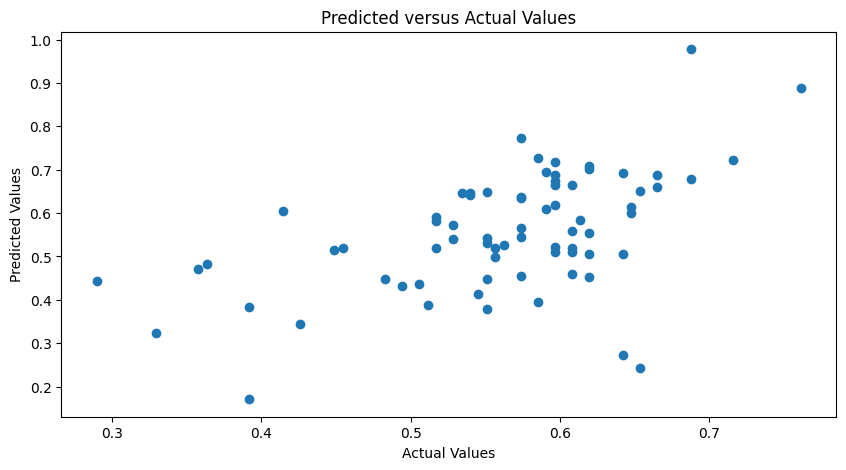

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted versus Actual Values")
plt.show()